In [3]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

%matplotlib inline
warnings.simplefilter('ignore')

In [4]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [5]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [6]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [7]:
DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [8]:
train= pd.read_csv(DATASET_PATH)
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [9]:
test = pd.read_csv(TEST_DATASET_PATH)
test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

Целеваяя переменная

In [12]:
target_name = 'Credit Default'
feature_names = train.columns.drop(target_name).tolist()
all_features = feature_names + [target_name]
train[target_name].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Целевая переменная не сбалансирован.

Обзор количественных признаков.

In [13]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


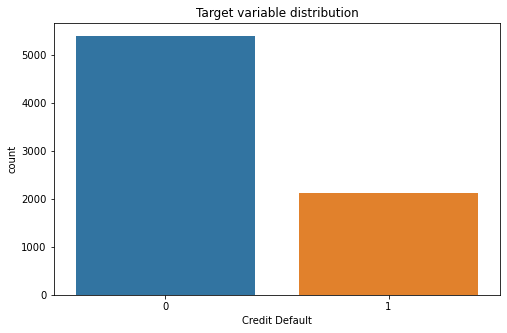

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x=target_name, data=train)
plt.title('Target variable distribution')
plt.show()

In [15]:
target_mean = train[target_name].mean()
target_median = train[target_name].median()
target_mode = train[target_name].mode()[0]

target_mean, target_median, target_mode

(0.28173333333333334, 0.0, 0)

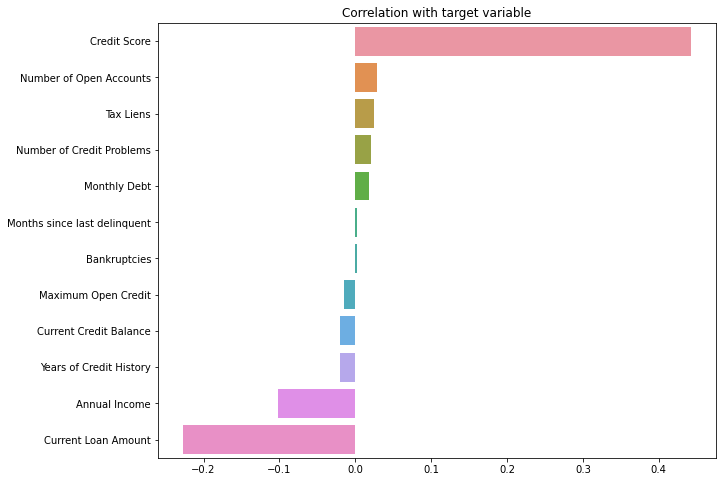

In [16]:
corr_with_target = train[feature_names + [target_name]].corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

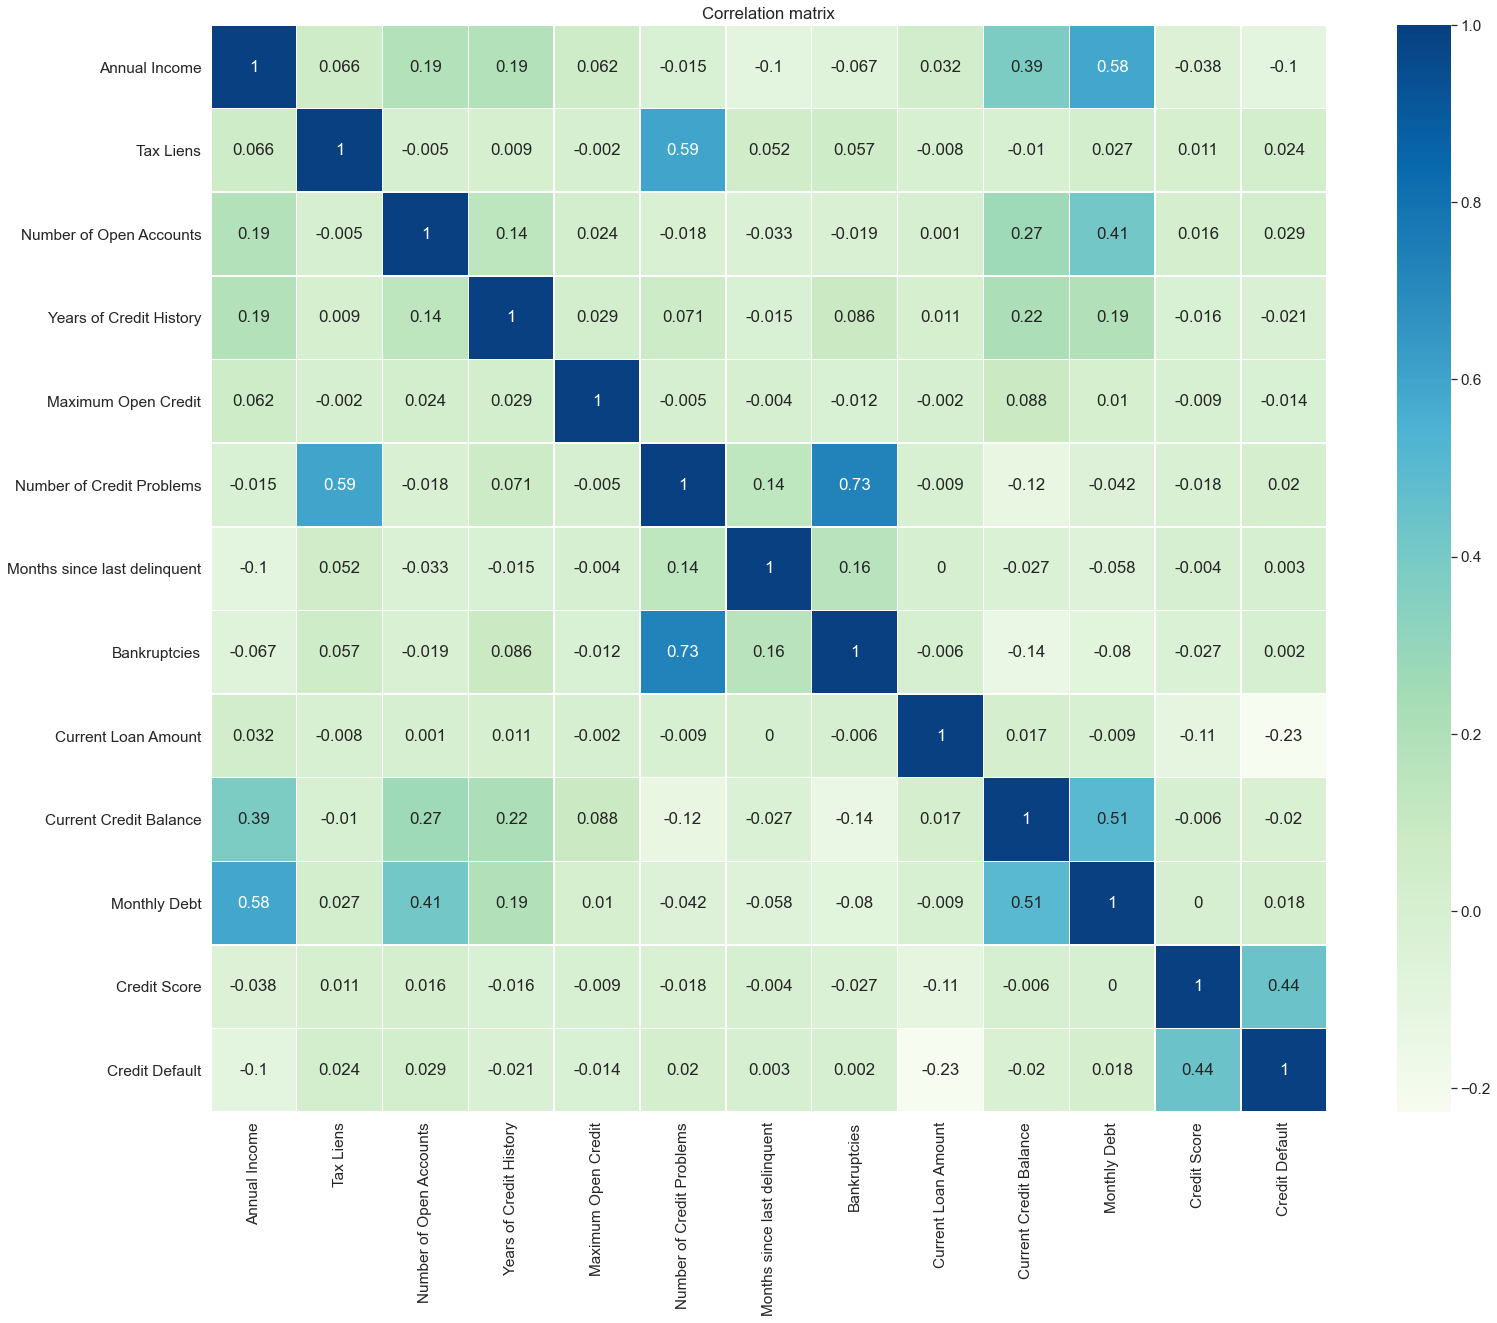

In [17]:
plt.figure(figsize = (25,20))
sns.set(font_scale=1.4)
sns.heatmap(train.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show()

Обработка пропусков и построение новых признаков

In [18]:
for cat_colname in train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

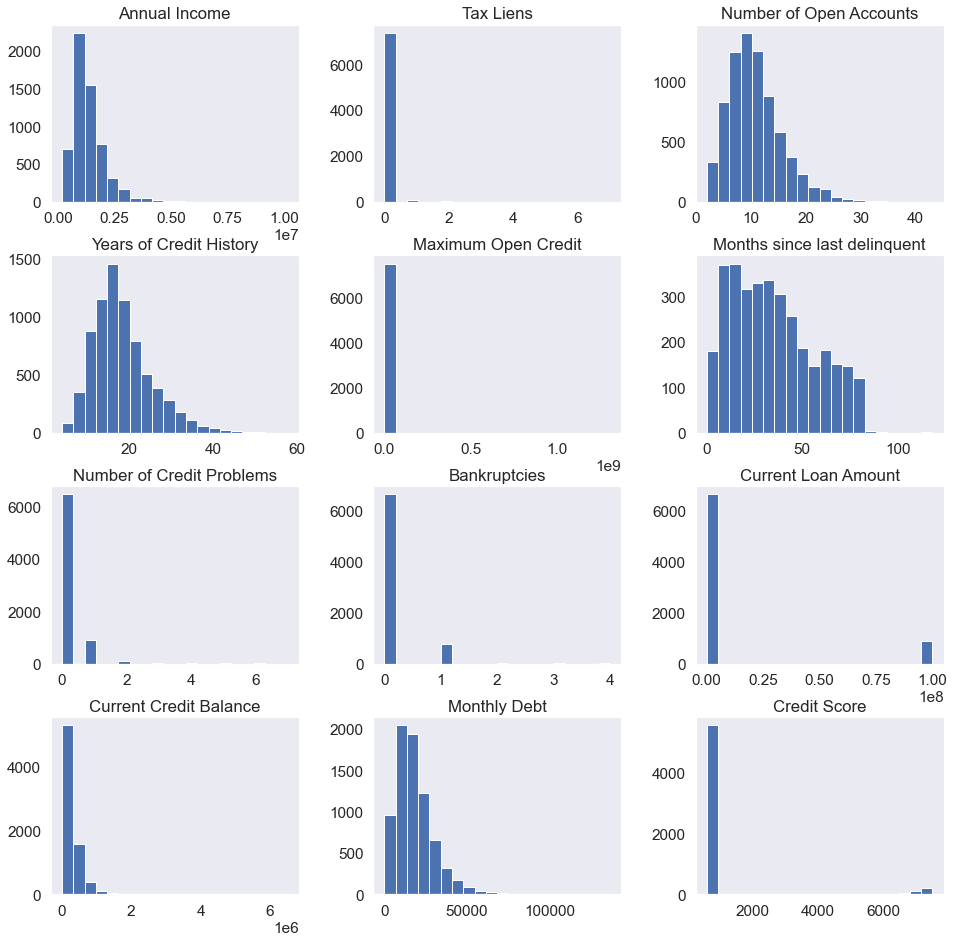

In [20]:
features_num = ['Annual Income','Tax Liens','Number of Open Accounts','Years of Credit History','Maximum Open Credit', 'Months since last delinquent','Number of Credit Problems','Bankruptcies', 'Current Loan Amount', 'Current Credit Balance','Monthly Debt','Credit Score']
train[features_num].hist(figsize=(16, 16), bins=20, grid=False);

In [21]:
len(train) - train.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [22]:
train['Annual Income'].value_counts()

1043651.0    4
1161660.0    4
1338113.0    4
969475.0     4
1058376.0    4
            ..
2185646.0    1
2326075.0    1
330429.0     1
1704965.0    1
648166.0     1
Name: Annual Income, Length: 5478, dtype: int64

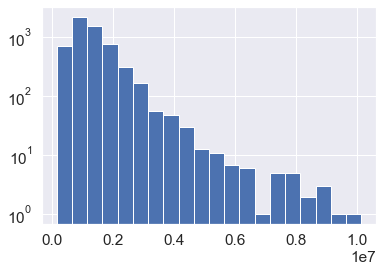

In [23]:
plt.hist(train['Annual Income'],bins=20)
plt.yscale(value="log")
plt.show()

In [24]:
median_annual_income = train['Annual Income'].median()
train['Annual Income'] = train['Annual Income'].fillna(median_annual_income)

In [25]:
median_annual_income = test['Annual Income'].median()
test['Annual Income'] = test['Annual Income'].fillna(median_annual_income)

In [26]:
train['Credit Score'].value_counts()

740.0     169
747.0     168
748.0     157
745.0     152
742.0     151
         ... 
629.0       1
606.0       1
6830.0      1
6670.0      1
620.0       1
Name: Credit Score, Length: 268, dtype: int64

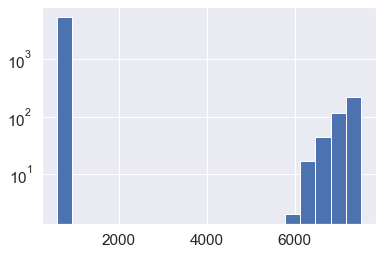

In [27]:
plt.hist(train['Credit Score'],bins=20)
plt.yscale(value="log")
plt.show()

In [28]:
median_cred_score = train['Credit Score'].median()
train['Credit Score'] = train['Credit Score'].fillna(median_cred_score)

In [29]:
median_cred_score = test['Credit Score'].median()
test['Credit Score'] = test['Credit Score'].fillna(median_cred_score)

In [30]:
train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

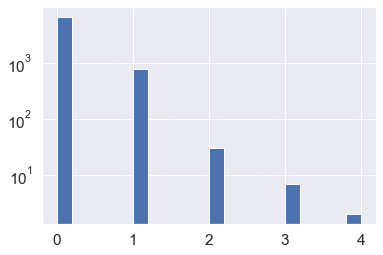

In [31]:
plt.hist(train['Bankruptcies'],bins=20)
plt.yscale(value="log")
plt.show()

In [32]:
train['Bankruptcies'] = train['Bankruptcies'].fillna(0)
test['Bankruptcies'] = test['Bankruptcies'].fillna(0)
train.loc[train['Years in current job'].isnull(), 'Years in current job'] = train['Years in current job'].mode()[0]
test.loc[test['Years in current job'].isnull(), 'Years in current job'] = test['Years in current job'].mode()[0]
train['Months since last delinquent'] = train['Months since last delinquent'].fillna(0)
test['Months since last delinquent'] = test['Months since last delinquent'].fillna(0)

In [33]:
train_prep= train.copy()

In [34]:
train_prep

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,0.0,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,0.0,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,1168386.0,10+ years,0.0,21.0,26.5,1141250.0,0.0,0.0,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,731.0,0


In [35]:
test_prep=test.copy()
test_prep

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,1178475.0,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,731.0
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,0.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,0.0,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,1178475.0,2 years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,731.0
2497,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,0.0,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,0.0,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


In [36]:
features_all = train_prep.columns.drop('Credit Default').tolist()

In [37]:
features_without_categ =['Annual Income','Tax Liens','Number of Open Accounts','Years of Credit History','Maximum Open Credit', 'Number of Credit Problems','Bankruptcies', 'Current Loan Amount', 'Current Credit Balance','Monthly Debt','Credit Score']
features_categ=['Home Ownership','Years in current job','Purpose','Term']

In [38]:
for colname in features_categ:
   train_prep[colname] = pd.Categorical(train_prep[colname])
    
train_prep[features_categ].dtypes

Home Ownership          category
Years in current job    category
Purpose                 category
Term                    category
dtype: object

In [39]:
for colname in features_categ:
    test_prep[colname] = pd.Categorical(test_prep[colname])
    
test_prep[features_categ].dtypes

Home Ownership          category
Years in current job    category
Purpose                 category
Term                    category
dtype: object

In [40]:
X=pd.DataFrame(train_prep, columns=features_all)
X.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0


In [41]:
y = train_prep['Credit Default']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=train_prep['Credit Default'], random_state=2)
X_train.shape, X_test.shape

((6000, 16), (1500, 16))

In [46]:
y_train.value_counts()

0    4310
1    1690
Name: Credit Default, dtype: int64

In [47]:
def balance_df_by_target(train, target_name):

    target_counts = train[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample =train[train[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        train = train.append(sample, ignore_index=True)

    return train.sample(frac=1) 

In [48]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, target_name)
df_balanced[target_name].value_counts()

0    4310
1    3380
Name: Credit Default, dtype: int64

In [49]:
X_train = df_balanced.drop(columns=target_name)
y_train = df_balanced[target_name]

In [50]:
disbalance = y_train.value_counts()[0] / y_train.value_counts()[1]
disbalance

1.2751479289940828

In [51]:
import catboost as cb
cb_params = {
    "n_estimators": 2000,
    "loss_function": "Logloss",
    "eval_metric": "F1",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 7,
    "l2_leaf_reg": 3,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42,
    "cat_features": features_categ
}

In [53]:
cbc = cb.CatBoostClassifier(**cb_params)
cbc.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

0:	learn: 0.5449755	test: 0.5449755	test1: 0.4531025	best: 0.4531025 (0)	total: 217ms	remaining: 7m 14s
10:	learn: 0.5644062	test: 0.5642498	test1: 0.4847682	best: 0.4927916 (4)	total: 825ms	remaining: 2m 29s
20:	learn: 0.5612357	test: 0.5595435	test1: 0.4888268	best: 0.4927916 (4)	total: 1.49s	remaining: 2m 20s
30:	learn: 0.5655934	test: 0.5653373	test1: 0.4873950	best: 0.4927916 (4)	total: 2.06s	remaining: 2m 11s
40:	learn: 0.5737344	test: 0.5720564	test1: 0.4951321	best: 0.4951321 (40)	total: 2.64s	remaining: 2m 6s
50:	learn: 0.5787452	test: 0.5780051	test1: 0.4911323	best: 0.4965706 (45)	total: 3.23s	remaining: 2m 3s
60:	learn: 0.5864469	test: 0.5842615	test1: 0.4951857	best: 0.4972527 (59)	total: 3.81s	remaining: 2m 1s
70:	learn: 0.5975210	test: 0.5998553	test1: 0.4937931	best: 0.4972527 (59)	total: 4.4s	remaining: 1m 59s
80:	learn: 0.6119510	test: 0.6168091	test1: 0.5061224	best: 0.5061224 (80)	total: 5.04s	remaining: 1m 59s
90:	learn: 0.6221586	test: 0.6261913	test1: 0.5087957	b

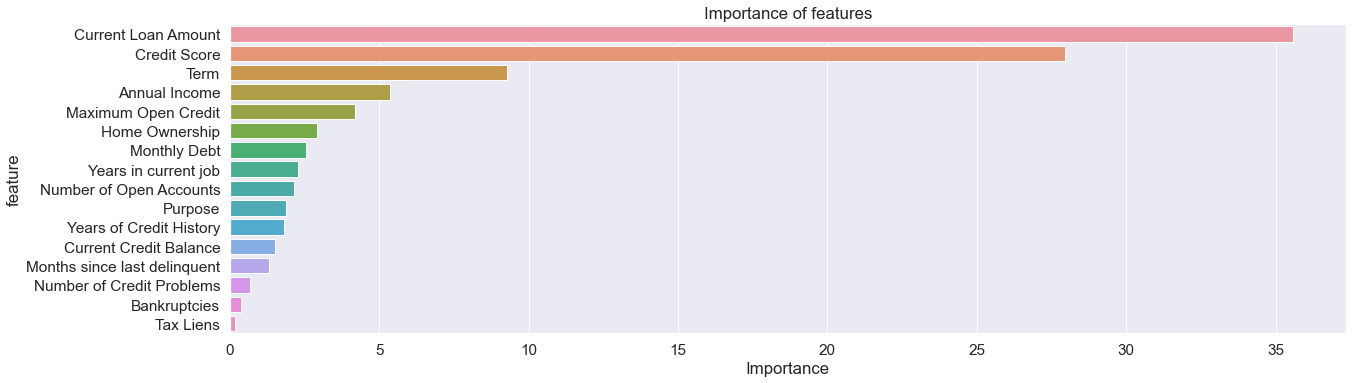

In [54]:
important_features_top = show_feature_importances(X_train.columns, cbc.feature_importances_, get_top=23)

In [55]:
pred_train = cbc.predict(X_train)
pred_test = cbc.predict(X_test)

pred_proba_test = cbc.predict_proba(X_test)
pred_proba_test[:5]

array([[0.73740869, 0.26259131],
       [0.51511085, 0.48488915],
       [0.57031429, 0.42968571],
       [0.99130836, 0.00869164],
       [0.66915973, 0.33084027]])

In [57]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)
print(f'Accuracy на трейне {accuracy_train}')
print(f'Accuracy на тесте {accuracy_test}')

Accuracy на трейне 0.7487646293888166
Accuracy на тесте 0.7586666666666667


In [70]:
X_test = pd.DataFrame(test, columns=features_all)

In [75]:
preds_test = cbc.predict(X_test)
preds_test 

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [76]:
output = pd.DataFrame({'Id': np.arange(0,preds_test.shape[0]),
                       'Credit Default': preds_test.flatten()})
output.to_csv('submission.csv', index=False)

In [77]:
output.head(100)

,Id,Credit Default
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
95,95,0
96,96,0
97,97,0
98,98,0


In [78]:
output['Credit Default'].value_counts()

0    1922
1     578
Name: Credit Default, dtype: int64